In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
plt.rc('text', usetex=True)
np.set_printoptions(precision=4)


from ipywidgets import IntProgress
from IPython.display import display
from ipywidgets import IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual

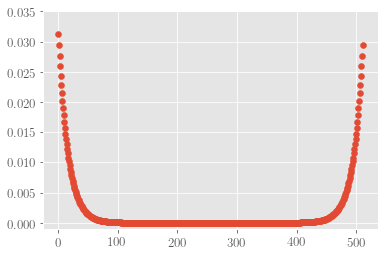

In [4]:
s1 = np.genfromtxt("signal1.dat")
s2 = np.genfromtxt("signal2.dat")
s3 = np.genfromtxt("signal3.dat")
s0 = np.genfromtxt("signal0.dat")
l = 512
tau = 16
razpon = np.arange(0, 512,1)
r = np.exp(-np.abs(razpon)/tau)/2/tau + np.exp(-np.abs(512-razpon)/tau)/2/tau
plt.scatter(razpon,r)
plt.ylim((-0.001,0.035))
plt.savefig("2-1-r.pdf")

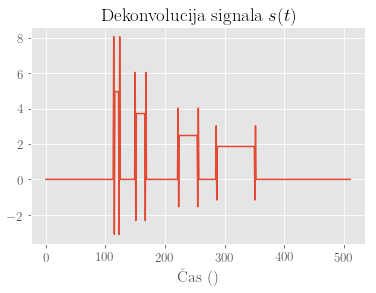

In [15]:
s = s0
C_f = np.fft.fft(s)
R_f = np.fft.fft(r)
U_f = C_f/R_f
u = np.fft.ifft(U_f)
plt.plot(u)
plt.xlabel("Čas ()")
plt.title(r"Dekonvolucija signala $s(t)$")
plt.savefig("2-2-dekonvolucija-s0.pdf", bbox_inches=0)

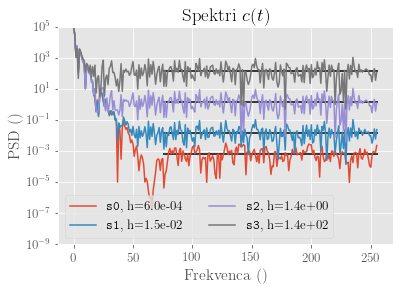

In [96]:
slovar = {"s0":s0, "s1":s1, "s2":s2, "s3":s3}
sumi = {}
for ime, s in slovar.items():
    S = np.fft.fft(s)
    S = np.abs(S)**2
    S = S[:len(S)//2]
    h = np.median(S[75:])
    sumi[ime] = h
    plt.hlines(h, 75, 512//2)
    plt.plot(S, label=fr"\texttt{{{ime}}}, h={{{h:0.1e}}}")
plt.xlabel("Frekvenca ()")
plt.ylabel("PSD ()")
plt.ylim((1e-9,1e5))
plt.semilogy()
plt.title(r"Spektri $c(t)$")
plt.legend(ncol=2)
#plt.savefig("2-3-spektri.pdf")
plt.show()

Naiven poskus, kjer S = G = signal{0,1,2,3}

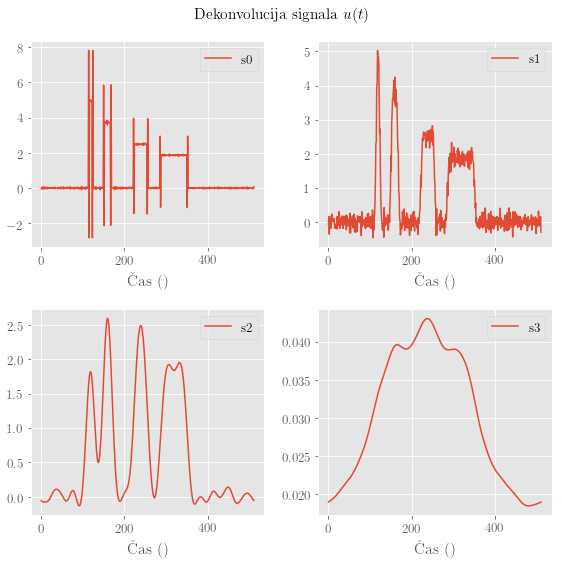

In [97]:
#sumi = {"s0":1e-3, "s1":0.1, "s2":10, "s3":100}
plt.figure(figsize=(8,8))
#sumi["s3"] = 2
for i, (ime, s) in enumerate(slovar.items()):
    stevilka_subplota = int("22"+str(i+1))
    plt.subplot(stevilka_subplota)
    #if ime=="s1":continue
    C = np.fft.fft(s)
    S = np.fft.fft(s0)
    N = np.full_like(C, 10*sumi[ime])
    Fi = (np.abs(S)**2)/(np.abs(S)**2+np.abs(N)**2)
    R = np.fft.fft(r)
    U = C * Fi / R
    u = np.fft.ifft(U)
    plt.plot(u, label=ime)
    plt.legend(ncol=2)
    plt.xlabel("Čas ()")
plt.suptitle(r"Dekonvolucija signala $u(t)$")
plt.tight_layout(h_pad=1.3, rect=(0,0,1,0.95))
plt.savefig("2-4-vse-dekonvolucije.pdf", bbox_inches=0)
plt.show()
    

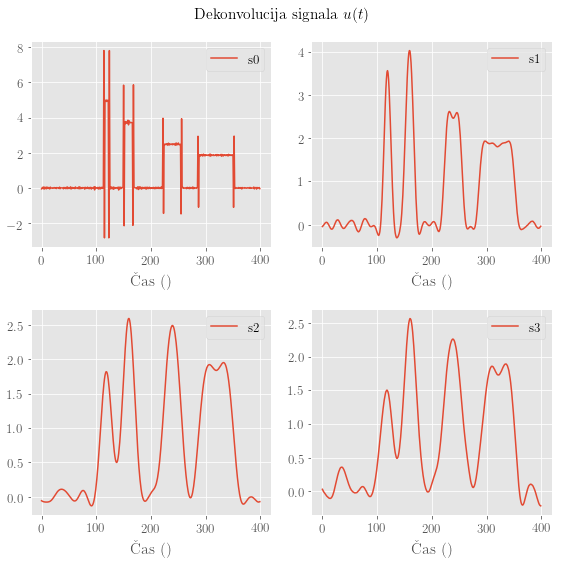

In [109]:
plt.figure(figsize=(8,8))
sumi ={
 's0': 0.0006038419780373368,
 's1': 0.1536981993848554,
 's2': 1.4101364150186275,
 's3': 2}
for i, (ime, s) in enumerate(slovar.items()):
    stevilka_subplota = int("22"+str(i+1))
    plt.subplot(stevilka_subplota)
    #if ime=="s1":continue
    C = np.fft.fft(s)
    S = np.fft.fft(s0)
    N = np.full_like(C, 10*sumi[ime])
    Fi = (np.abs(S)**2)/(np.abs(S)**2+np.abs(N)**2)
    R = np.fft.fft(r)
    U = C * Fi / R
    u = np.fft.ifft(U)
    plt.plot(u[:400], label=ime)
    plt.legend(ncol=2)
    plt.xlabel("Čas ()")
plt.suptitle(r"Dekonvolucija signala $u(t)$")
plt.tight_layout(h_pad=1.3, rect=(0,0,1,0.95))
plt.savefig("2-4-vse-dekonvolucije-izboljsano.pdf", bbox_inches=0)
plt.show()